* What is MoA?
> In pharmacology, the term Mechanism of Action (MoA) refers to the specific biochemical interaction through which a drug substance produces its pharmacological effect. A mechanism of action usually includes mention of the specific molecular targets to which the drug binds, such as an enzyme or receptor. Receptor sites have specific affinities for drugs based on the chemical structure of the drug, as well as the specific action that occurs there.

* A short brief about the dataset.

> In this competition, the task is predicting multiple targets of the Mechanism of Action (MoA) responses of different samples. Samples are drugs profiled at different time points and doses, and there are more than 20,000 drugs in dataset. Dataset also consists of various group of features and there are more than two hundred targets of enzymes and receptors.

* Machine Learning Approach

> We are supposed to identify the Mechanism of Action (MoA)of a new drug based on the available information of cell viability and gene expressions and their target MoA. In this problem scientists seek to identify a protein target associated with the disease and develop a molecule that can modulate that protein target. As a shorthand to describe the biological activity of a given molecule, scientists assign a label referred to as mechanism-of-action or MoA for short. Here our target variable is MoA and features used to predict MoA are cell viability and gene expressions. We have been provided the information about human cell responses to drug within a pool of 100 cell types and 772 gene expressions in addition we have access to MoA annotations of more that 20,000 drugs. Each drug can have more than one MoA, so this is an interesting part where we need to perform multi label classification on the data. 

* Features

* sig_id is the unique sample id
* Features with g- prefix are gene expression features and there are 772 of them (from g-0 to g-771)
* Features with c- prefix are cell viability features and there are 100 of them (from c-0 to c-99)
* cp_type is a binary categorical feature which indicates the samples are treated with a compound or with a control perturbation (trt_cp or ctl_vehicle)
* cp_time is a categorical feature which indicates the treatment duration (24, 48 or 72 hours)
* cp_dose is a binary categorical feature which indicates the dose is low or high (D1 or D2)

### Objective and Metric

* There are two groups of target features; scored target features and non-scored target features. Both of those groups consist of binary MoA targets but only the first group is used for the scoring, so this is a multi-label classification problem.

* This is a multi-label binary classification problem, and metric used for the evaluation is mean columnwise log loss. For every row, a probability that the sample had a positive response for each target, has to be predicted. For  N  rows and  M  targets, there will be  N×M  predictions.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="1.44em">
    <mtext>log loss</mtext>
    <mo>=</mo>
    <mo>&#x2212;<!-- − --></mo>
    <mfrac>
      <mn>1</mn>
      <mi>M</mi>
    </mfrac>
    <munderover>
      <mo>&#x2211;<!-- ∑ --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>m</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>M</mi>
      </mrow>
    </munderover>
    <mfrac>
      <mn>1</mn>
      <mi>N</mi>
    </mfrac>
    <munderover>
      <mo>&#x2211;<!-- ∑ --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>i</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>N</mi>
      </mrow>
    </munderover>
    <mrow>
      <mo>[</mo>
      <msub>
        <mi>y</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>i</mi>
          <mo>,</mo>
          <mi>m</mi>
        </mrow>
      </msub>
      <mi>log</mi>
      <mo>&#x2061;<!-- ⁡ --></mo>
      <mo stretchy="false">(</mo>
      <msub>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>y</mi>
            <mo stretchy="false">&#x005E;<!-- ^ --></mo>
          </mover>
        </mrow>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>i</mi>
          <mo>,</mo>
          <mi>m</mi>
        </mrow>
      </msub>
      <mo stretchy="false">)</mo>
      <mo>+</mo>
      <mo stretchy="false">(</mo>
      <mn>1</mn>
      <mo>&#x2212;<!-- − --></mo>
      <msub>
        <mi>y</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>i</mi>
          <mo>,</mo>
          <mi>m</mi>
        </mrow>
      </msub>
      <mo stretchy="false">)</mo>
      <mi>log</mi>
      <mo>&#x2061;<!-- ⁡ --></mo>
      <mo stretchy="false">(</mo>
      <mn>1</mn>
      <mo>&#x2212;<!-- − --></mo>
      <msub>
        <mrow class="MJX-TeXAtom-ORD">
          <mover>
            <mi>y</mi>
            <mo stretchy="false">&#x005E;<!-- ^ --></mo>
          </mover>
        </mrow>
        <mrow class="MJX-TeXAtom-ORD">
          <mi>i</mi>
          <mo>,</mo>
          <mi>m</mi>
        </mrow>
      </msub>
      <mo stretchy="false">)</mo>
      <mo>]</mo>
    </mrow>
  </mstyle>
</math>

* N  is the number of rows ( i=1,…,N )
* M  is the number of targets ( m=1,…,M )
* y^i,m  is the predicted probability of the ith row and mth target
* yi,m  is the ground truth of the ith row and mth target (1 for a positive response, 0 otherwise)
* log()  is the natural logarithm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import datetime
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics 

# Reading Data

In [2]:
# Reading train dataset
train = pd.read_csv("/content/train_features.csv")
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
# Reading test dataset
test = pd.read_csv("/content/test_features.csv")
test.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,-0.2140,0.2221,-0.3260,1.9390,-0.2305,-0.3670,1.3040,1.4610,0.0043,0.6816,-0.2304,-0.0635,-0.2030,-0.6821,-0.6242,0.1297,-0.0338,0.3372,0.2254,0.4795,0.7642,0.6638,-0.2480,-0.1183,-0.4847,-0.0179,-0.8204,-0.5296,-1.5070,-0.0144,...,-0.1353,0.0494,0.8939,0.2270,0.2876,-0.3065,0.6519,-0.8156,-1.4960,0.3796,0.0877,-1.0230,-0.0206,-0.4149,-0.6258,-0.2688,0.4403,-0.4900,0.2910,0.0473,-0.0914,0.3087,-0.0612,-0.9128,-0.9399,0.0173,0.0519,-0.0035,-0.5184,-0.3485,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,-1.8820,0.4022,-0.3528,0.1271,0.9303,0.3173,-1.0120,-0.3213,0.0607,-0.5389,-0.8030,-1.0600,-0.0978,-0.8156,-0.6514,0.6812,0.5246,0.0000,0.5030,-0.1500,-0.1433,2.0910,-0.6556,-0.6012,-0.4104,-0.0580,-0.3608,0.2197,-0.7101,1.3430,...,-0.7458,0.0458,-0.3644,-1.8180,-0.0358,-0.7925,-0.2693,-0.0938,-0.1833,-0.7402,-1.4090,0.1987,0.0460,-1.3520,-0.3445,-0.0909,-0.6337,-0.5788,-0.7885,0.0996,-1.9480,-1.2720,-0.7223,-0.5838,-1.3620,-0.7671,0.4881,0.5913,-0.4333,0.1234,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,-0.3390,-0.3206,0.6944,0.5837,-0.0553,-0.6222,2.5430,-0.7857,0.8163,-0.0495,0.1806,1.0290,-0.5204,-1.1070,0.7365,-0.3835,-0.5771,0.0523,-0.2690,0.1674,0.6010,-0.6660,0.0276,0.0924,0.2785,-0.3943,-0.4602,-0.0673,-1.3420,0.3127,...,0.4369,-1.4960,1.2390,-1.2220,0.6624,-0.7336,-0.5248,0.0727,0.1455,0.5364,-0.0823,0.5734,0.4876,0.7088,1.0750,0.4689,1.0870,-0.5036,-0.3451,0.5087,1.1100,0.7886,0.2093,-0.4617,1.4870,0.1985,1.1750,-0.5693,0.5062,-0.1925,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,0.5998,-0.1799,0.9365,0.2942,1.3990,-1.1080,1.1610,-0.8134,0.0743,-0.3096,-0.9956,1.7100,1.2200,-0.1258,-0.5900,-0.7956,-0.6765,0.0000,-0.8820,0.7609,-0.0882,0.5217,0.9587,-0.4764,0.2690,0.4753,0.0196,0.2775,-0.7142,0.7079,...,-1.2190,-0.5564,-0.2831,0.5902,-0.2881,-0.0013,-0.4036,-0.4076,-0.5593,-0.5505,-0.4806,-0.0846,0.5884,0.2310,0.3956,0.6495,-0.2511,-0.2207,0.1274,-0.5378,0.5649,-0.1231,0.1586,-0.4260,-0.6815,-0.4753,0.2611,-1.1780,0.1909,-1.2320,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,0.5128,0.6365,0.2611,-1.1120,-0.1747,-0.2053,-0.0006,0.0254,0.1784,-0.1314,1.0700,0.0477,-0.0756,0.1287,0.1403,0.7609,-0.1095,0.0000,-1.0950,-0.0780,0.9048,-0.3007,0.4351,-0.1558,0.2101,0.4850,0.1139,0.6745,-0.9101,-0.6690,...,0.6412,0.2123,0.0646,0.5924,0.5284,-0.4421,0.6547,-0.8098,0.9812,-0.0349,0.7816,1.1690,0.4140,1.0250,0.8642,0.5993,0.2091,-0.1521,1.5610,-0.6770,0.3600,-0.1436,-0.0949,1.0640,0.8321,0.9727,-0.5567,0.2240,0.8949,0.8668,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [4]:
#Reading target variable columns
target = pd.read_csv("/content/train_targets_scored.csv")
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exploratory Analysis
## Uderstanding shape of test,train and target datasets

In [5]:
train.shape

(23814, 876)

In [6]:
test.shape

(3982, 876)

In [7]:
target.shape

(23814, 207)

In [8]:
train.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0

In [9]:
train.dtypes.value_counts()

float64    872
object       3
int64        1
dtype: int64

## Finding categorical variables in the dataset

In [10]:

for col in train.columns:
    if train[col].dtype == "object":
        print(col)

sig_id
cp_type
cp_dose


In [11]:
count = 0
for col in train.columns:
    if(col.startswith('g-')):
        count +=1
print(count)

772


In [12]:
#Number of features with type gene expression

gene_exp = sum(train.columns.str.startswith('g-'))
gene_exp

772

In [13]:
#Number of features with type cell viability
cell_via = sum(train.columns.str.startswith('c-'))
cell_via

100

## Visualizing Gene and Cell types

> For numerical variables, we specially check the gene expressions. From the distribution plot of gene expression features we can see that most of the samples are normally distributed with mean 0 and values range from -10 to +10. 

## Gene Expression Features
* Gene expression is the amount and type of proteins that are expressed in a cell at any given point in time. 
* There are 772 gene expression features and they have g- prefix (g-0 to g-771). Each gene expression feature represents the expression of one particular gene, so there are 772 individual genes are being monitored in this assay.

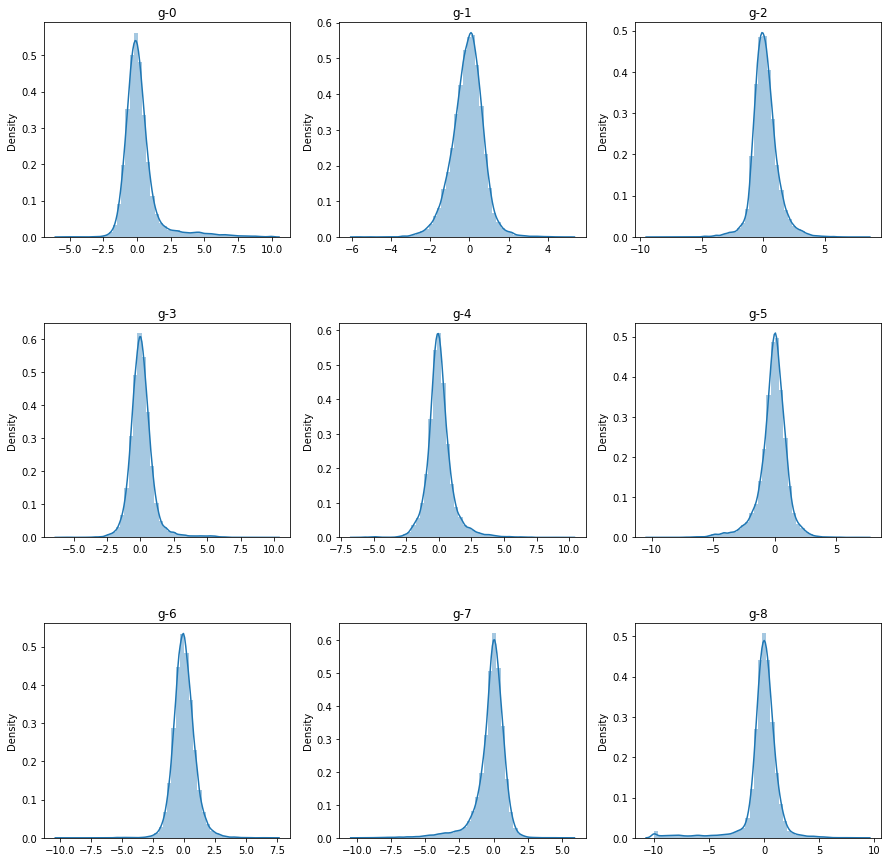

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+4])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Cell Viability Features
* Cell viability is a measure of the proportion of live, healthy cells within a population. Cell viability assays are used to determine the overall health of cells, optimize culture or experimental conditions.

* There are 100 cell-viability features and they have c- prefix (c-0 to c-99). Each cell-viability feature represents viability of one particular cell line, and all experiments are based on a set of similar cells.

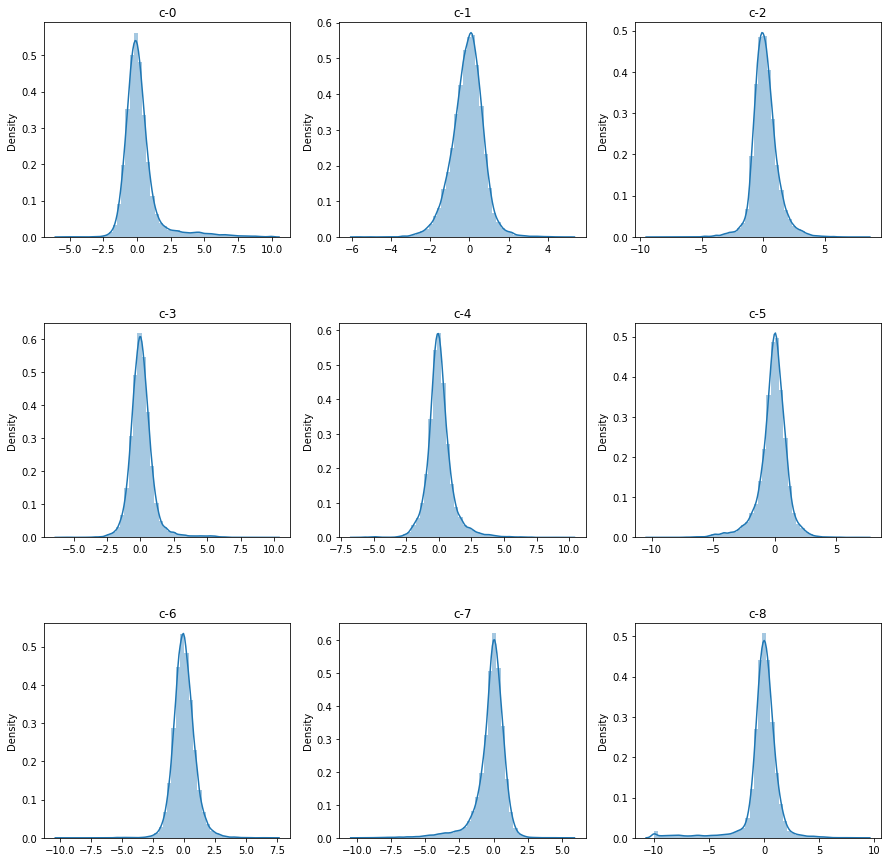

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(train.iloc[:,i+4])
    plt.title(train.columns[i+776])
    plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Categorical Features

* There are three categorical features; cp_type, cp_time and cp_dose. Two of them are binary features and one of them has three unique values, so the cardinality among those features, is very low. All of the categorical features have almost identical distributions in training set.

In [16]:
#Check on categorical variables

train['cp_type'].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [17]:
train.cp_time.unique()

array([24, 72, 48])

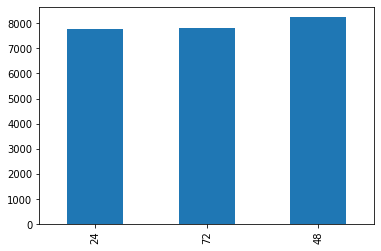

In [18]:
train['cp_time'].value_counts().sort_values().plot(kind = 'bar')

## cp_time
* cp_time is categorical feature in the dataset and it has three unique values; 24, 48 and 72 hours. It indicates the treatment durations of the samples. Sample counts of different cp_time values are very consistent and close to each other in different targets. Sample counts are either extremely close to each other or 48 is slightly higher than the others.

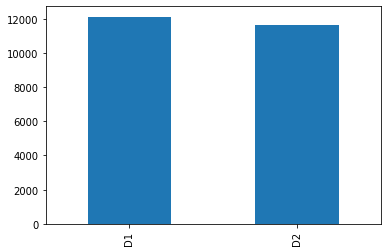

In [19]:
train['cp_dose'].value_counts().plot(kind = 'bar')

## cp_dose
* cp_dose is categorical feature in the dataset and it is also a binary feature. It indicates whether the dose of the samples are either low (D1) or high (D2).

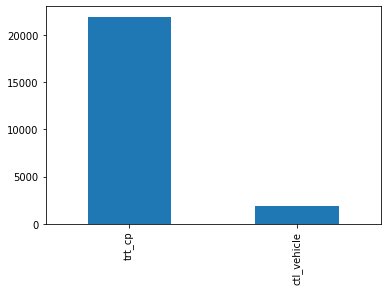

In [20]:
train['cp_type'].value_counts().plot(kind = 'bar')

## cp_type
* cp_type is categorical feature in the dataset and it is a binary feature. It either means that samples are treated with a compound (trt_cp) or with a control perturbation (ctl_vehicle). Samples treated with control perturbations have no MoAs, thus all of their scored and non-scored target labels are zeros.

## Treating Categorical variables for Train and Test Data

In [21]:
train = pd.get_dummies(train, columns = ['cp_time'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_time'], drop_first=True)

In [22]:
train = pd.get_dummies(train, columns = ['cp_dose'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_dose'], drop_first=True)

In [23]:
train = pd.get_dummies(train, columns = ['cp_type'], drop_first=True)
test = pd.get_dummies(test, columns = ['cp_type'], drop_first=True)

In [24]:
train.head()

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1


# Understanding Target Variables

* Target features are categorized into two groups; scored and non-scored target features, and features in both of those groups are binary. The competition score is based on the scored target features but non-scored group can still be used for model evaluation, data analysis and feature engineering.

* It is a multi-label classification problem but one sample can be classified to multiple targets or none of the targets as well. Most of the time, samples are classified to 0 or 1 target, but a small part of the training set samples are classified to 2, 3, 4, 5 and 7 different targets at the same time. Classified targets distributions are not very similar for scored targets and non-scored targets since there is a huge discrepancy of 0 and 1 classified targets.

Text(0.5, 0, 'Label Count')

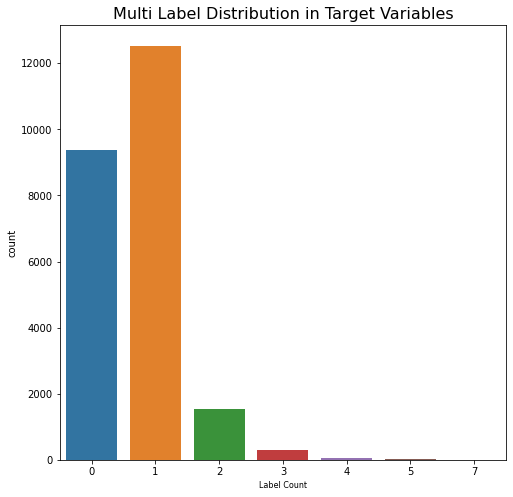

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(target.iloc[:,1:].sum(axis=1))
plt.title("Multi Label Distribution in Target Variables",fontsize=16)
plt.xlabel("Label Count",fontsize=8)

> All the target columns are binary in nature, indicating whether a cell type responds to the drug or not. Since, this is a multi-label classification problem drug samples can have multiple MoA i.e. more than one target variable class can be active. We draw the bar plot to show multi label distribution in target variables.

* Scored Target Features

* The most commmonly classified scored targets are nfkb inhibitor, proteasome inhibitor, cyclooxygenase inhibitor, dopamine receptor antagonist, serotonin receptor antagonist and dna_inhibitor, and there are more than 400 samples classified to each of them. The most rarely classified scored targets are atp-sensitive potassium channel antagonist and erbb2 inhibitor, and there is only one sample classified to each of them. A similar classification distribution is expected in test set.

* There are lots of scored targets classified with the same number of times which suggests there might be a relationship between them.

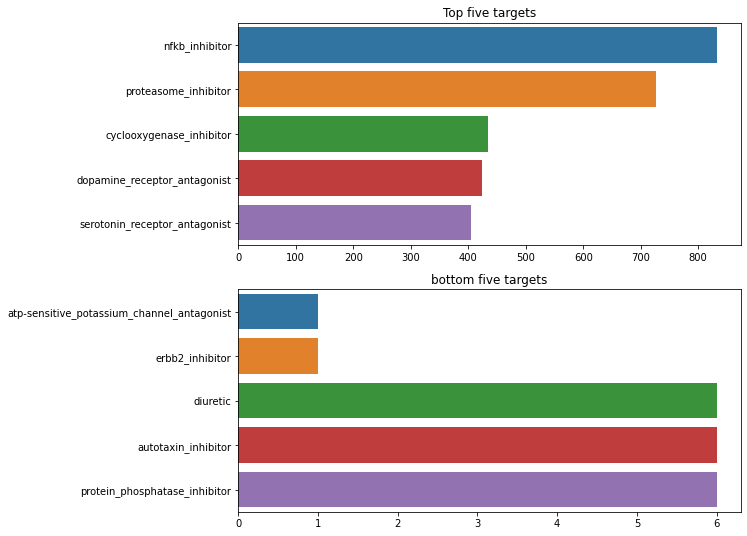

In [26]:
#Visualising top 5 targets and bottom 5 targets
target1  = target.drop(['sig_id'] , axis =1)
top_targets = pd.Series(target1.sum()).sort_values(ascending=False)[:5]
bottom_targets = pd.Series(target1.sum()).sort_values()[:5]
fig, axs = plt.subplots(figsize=(9,9) , nrows=2)
sns.barplot(top_targets.values , top_targets.index , ax = axs[0] ).set(title = "Top five targets")
sns.barplot(bottom_targets.values , bottom_targets.index, ax = axs[1] ).set(title = "bottom five targets")
plt.show()

# Cleaning Data

In [27]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [28]:
test.columns[test.isnull().any()]

Index([], dtype='object')

## Merging target into single column

In [29]:
target['total_cells_reacted'] = target.sum(axis=1)

target['cell_reaction'] = np.minimum(1,target['total_cells_reacted'])

In [30]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# Defining the target variable

In [31]:
# cell reaction as target 
target['cell_reaction'].value_counts()

1    14447
0     9367
Name: cell_reaction, dtype: int64

## t-test to check on all features and check if p-value <0.05

* The null hypothesis states that there is no relationship between the two variables being studied (one variable does not affect the other).
* The alternative hypothesis states that the independent variable did affect the dependent variable.
### How do you know if a p-value is statistically significant?
* The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that we should reject the null hypothesis.
* A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

In [32]:
count = 0
x =[]
for col in train.columns:
    if col in ['sig_id', 'cp_type', 'cp_time', 'cp_dose']:
        continue
    if stats.ttest_ind(train[col], test[col]).pvalue < 0.05:
        print(col, stats.ttest_ind(train[col], test[col]).pvalue)
        x.append(col)
        count += 1

g-0 0.032543038217202086
g-1 0.019393109454476025
g-3 0.046721309178349664
g-22 6.587624616736739e-05
g-37 0.010911040292799237
g-48 0.030801708455925808
g-50 0.03531252898048682
g-52 0.028092336066332588
g-60 0.003985876456805001
g-72 0.03734120596180097
g-98 0.002596791303651995
g-100 0.008351686077946879
g-101 3.938347554051903e-05
g-105 0.0429096270660344
g-110 0.007002341005554218
g-119 0.0026784043039369777
g-120 0.04036243989718826
g-121 0.018277391157227284
g-134 0.024952122240263698
g-135 5.2762961694835665e-05
g-136 0.014781889784802717
g-139 0.032409758453034926
g-140 0.029888796018104586
g-145 0.04082269273028868
g-150 0.02741917010243746
g-152 0.029540491011946193
g-158 0.006359327029617653
g-165 0.015874095698013277
g-166 0.044642334463927895
g-168 0.04202225455856443
g-169 0.03499856643946845
g-174 0.018682872175197398
g-186 0.008947447524514207
g-193 0.027903058327269626
g-206 0.031924304036266206
g-211 0.0011897547708701196
g-215 0.023199568324813253
g-224 0.0373056782

In [33]:
count

124

* As the above listed 124 features have p-value < 0.05, hence we can say that those features are highly dependent on target variable. 

# Data Modeling

In [34]:
train_target = train.merge(target[['sig_id','cell_reaction']],  on='sig_id', how='inner')

In [35]:
train_target.head()

,sig_id,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,...,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_48,cp_time_72,cp_dose_D2,cp_type_trt_cp,cell_reaction
0,id_000644bb2,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,1,1
1,id_000779bfc,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,1,0,1,0
2,id_000a6266a,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,...,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,1,0,0,1,1
3,id_0015fd391,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,...,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,1,0,0,1,0
4,id_001626bd3,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,...,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,1,1,1,1


In [36]:
# Defining input and target columns
X = train_target.drop(['sig_id','cell_reaction'],axis=1)
y = train_target['cell_reaction']

In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41,shuffle= True)

## Performing LogRegression and RandomForestClassifier using KFold method

In [38]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
              ('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('GB',GradientBoostingClassifier()),
              ('GNB',GaussianNB())
              
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    #target_names = ['malware', 'clean']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

## CLassification Report and Accuracy Report

In [39]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.65      0.40      0.49      1928
           1       0.68      0.86      0.76      2835

    accuracy                           0.67      4763
   macro avg       0.66      0.63      0.62      4763
weighted avg       0.67      0.67      0.65      4763

RF
              precision    recall  f1-score   support

           0       0.77      0.28      0.41      1928
           1       0.66      0.94      0.78      2835

    accuracy                           0.68      4763
   macro avg       0.71      0.61      0.59      4763
weighted avg       0.70      0.68      0.63      4763

GB
              precision    recall  f1-score   support

           0       0.95      0.24      0.38      1928
           1       0.66      0.99      0.79      2835

    accuracy                           0.69      4763
   macro avg       0.80      0.61      0.58      4763
weighted avg       0.78      0.69      0.62      4763

GNB
  

In [40]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,2.210065,0.071393,0.662573,0.652333,0.662573,0.645502,0.690279,LogReg
1,2.185768,0.063686,0.658740,0.648663,0.658740,0.641979,0.696778,LogReg
2,2.178168,0.065726,0.670079,0.659082,0.670079,0.654730,0.696365,LogReg
3,48.899366,0.636106,0.688710,0.719585,0.688710,0.640982,0.675573,RF
4,48.956202,0.643574,0.679055,0.706651,0.679055,0.629430,0.676023,RF
5,48.067590,0.652580,0.684409,0.694862,0.684409,0.641576,0.684853,RF
6,413.233911,0.169405,0.691545,0.762301,0.691545,0.630716,0.696013,GB
7,412.084050,0.157529,0.685197,0.755980,0.685197,0.622377,0.697073,GB
8,412.398759,0.152334,0.701575,0.771918,0.701575,0.642231,0.713499,GB
9,0.221015,0.173350,0.468273,0.638419,0.468273,0.399429,0.660247,GNB


## Performing AdaBoost

In [42]:
adabclass = AdaBoostClassifier(n_estimators=100,learning_rate = 0.01, random_state=42)
adabclass.fit(X_train,y_train)
y_predict =adabclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34      1928
           1       0.65      1.00      0.79      2835

    accuracy                           0.68      4763
   macro avg       0.82      0.60      0.56      4763
weighted avg       0.79      0.68      0.61      4763



## Tunning the model
### Using RandomForestClassifier by changinng n_estimator,max_features and other parameters

In [43]:
random_forest = RandomForestClassifier(n_estimators = 200,oob_score = True,n_jobs = -1, min_samples_leaf =4)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.24      0.38      1928
           1       0.65      0.98      0.79      2835

    accuracy                           0.68      4763
   macro avg       0.77      0.61      0.58      4763
weighted avg       0.75      0.68      0.62      4763



In [44]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 50)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.23      0.36      1928
           1       0.65      0.99      0.79      2835

    accuracy                           0.68      4763
   macro avg       0.79      0.61      0.57      4763
weighted avg       0.76      0.68      0.61      4763



In [45]:
random_forest = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 20)
#Train Model
random_forest.fit(X_train, y_train)
# Predict Model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.23      0.37      1928
           1       0.65      0.98      0.78      2835

    accuracy                           0.68      4763
   macro avg       0.78      0.61      0.58      4763
weighted avg       0.76      0.68      0.62      4763



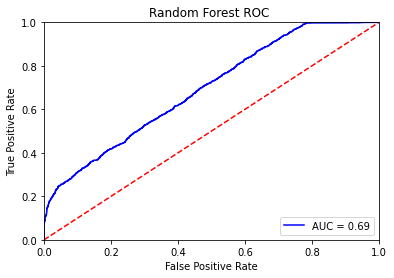

In [46]:
#Plotting ROC
probs = random_forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Random Forest ROC ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using GradientBoostingClassifier to fine tune the model by changing learning_rate and other parameters

In [47]:
gbclass = GradientBoostingClassifier(random_state =0)
gbclass.fit(X_train,y_train)
y_predict = gbclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.24      0.38      1928
           1       0.66      0.99      0.79      2835

    accuracy                           0.69      4763
   macro avg       0.80      0.61      0.58      4763
weighted avg       0.78      0.69      0.62      4763



In [48]:
%%time
gbclass = GradientBoostingClassifier(random_state =0, learning_rate = 0.01,n_estimators=500
                                     ,max_depth=6,min_samples_split = 10 )
gbclass.fit(X_train,y_train)
y_predict = gbclass.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.24      0.38      1928
           1       0.66      0.99      0.79      2835

    accuracy                           0.69      4763
   macro avg       0.80      0.62      0.59      4763
weighted avg       0.78      0.69      0.62      4763

CPU times: user 1h 38min 18s, sys: 2.81 s, total: 1h 38min 21s
Wall time: 1h 38min 4s


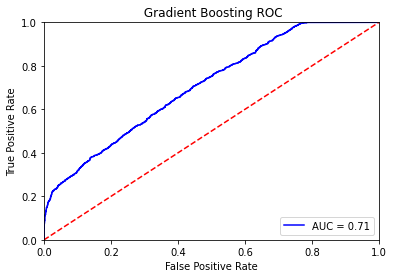

In [49]:
#Plotting ROC 
probs = gbclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title(' Gradient Boosting ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, preds)

# Defining Target column as Total number of cells reacted

In [51]:
X = train.drop(['sig_id'],axis=1)
y = target['total_cells_reacted']

# Classifying Target 

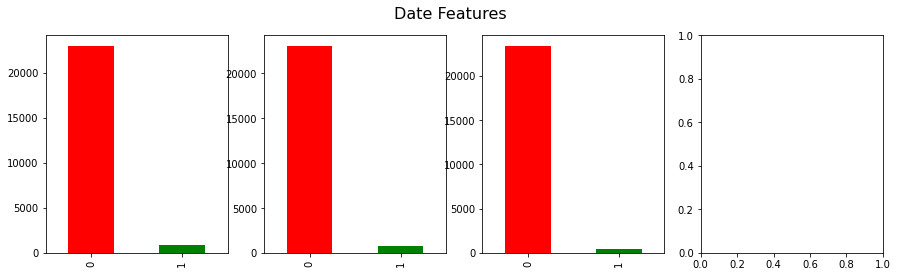

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4),sharex =False)
fig.suptitle("Date Features", fontsize=16)

fig.set_figwidth(15)
# fig.set_figheight(10)

target['nfkb_inhibitor'].value_counts().plot(kind='bar', ax=axes[0],color=list('rgbkymc'))
target['proteasome_inhibitor'].value_counts().plot(kind='bar', ax=axes[1],color =list('rg'))
target['cyclooxygenase_inhibitor'].value_counts().plot(kind='bar', ax=axes[2],color=list('rg'))
#df['ReportTime_month'].value_counts().plot(kind='bar', ax=axes[3],color =list('gr'))


In [56]:
target['total_cells_reacted'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: total_cells_reacted, dtype: int64

In [57]:
x = target.drop(['sig_id'], axis=1).sum(axis=0).sort_values(ascending= False).reset_index()

In [58]:
cols = target.columns
def get_classname(row):
    for col in cols:
        if(row[col] == 1 and col != 'sig_id'):
            return col
    return "No_cells_reacted"

target['final_col'] = target.apply(get_classname,axis=1)


In [59]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,total_cells_reacted,cell_reaction,final_col
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,gsk_inhibitor
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No_cells_reacted
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,bcr-abl_inhibitor
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No_cells_reacted
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,calcium_channel_blocker


In [60]:
target['final_col'].value_counts()

No_cells_reacted                              9367
nfkb_inhibitor                                 796
cyclooxygenase_inhibitor                       423
dopamine_receptor_antagonist                   418
dna_inhibitor                                  384
                                              ... 
laxative                                         6
caspase_activator                                6
leukotriene_inhibitor                            6
ubiquitin_specific_protease_inhibitor            6
atp-sensitive_potassium_channel_antagonist       1
Name: final_col, Length: 205, dtype: int64

In [61]:
inhib = "inhibitor"
antag = "antagonist"
agon = "agonist"

def get_classtypes(col):
    if inhib in col.lower():
        return inhib
    if antag in col.lower():
        return antag
    if agon in col.lower():
        return agon
    if col == "No_cells_reacted":
        return "No_cells_reacted"
    return "Other"
    
target['cell_type'] = target['final_col'].apply(get_classtypes)

In [62]:
target['cell_type'].value_counts()

No_cells_reacted    9367
inhibitor           7756
antagonist          3261
agonist             2118
Other               1312
Name: cell_type, dtype: int64

In [63]:
target['MoA_classtype'] = pd.factorize(target['cell_type'])[0]

In [64]:
target['MoA_classtype'].value_counts()

1    9367
0    7756
3    3261
4    2118
2    1312
Name: MoA_classtype, dtype: int64

In [65]:
X = train.drop(['sig_id'],axis=1)
y = target['MoA_classtype']

In [66]:
y_test

19549    1
17824    1
6955     1
7521     1
15611    1
        ..
47       0
16766    1
15753    1
20011    0
19975    1
Name: cell_reaction, Length: 4763, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41,shuffle= True)

In [68]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
               
              ('RF', RandomForestClassifier(n_estimators=10)),
              ('RF_1', RandomForestClassifier(n_estimators=100)),
              ('RF_2', RandomForestClassifier(n_estimators=500)),
              ('GB',GradientBoostingClassifier(n_estimators=10))
              
              
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    #target_names = ['malware', 'clean']
    for name, model in models:
        #kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=90210)
        #cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        #print(log_loss(y_test,y_pred))
        
        print(100*(y_test == y_pred).sum()/X_test.shape[0])
#        print(classification_report(y_test, y_pred))
#         results.append(cv_results)
#         names.append(name)
#         this_df = pd.DataFrame(cv_results)
#         this_df['model'] = name
#         dfs.append(this_df)
#    final = pd.concat(dfs, ignore_index=True)
    return final

In [69]:
final = run_exps(X_train, y_train, X_test, y_test)

RF
47.17614948561831
RF_1
52.19399538106236
RF_2
53.45370564770103
GB
51.92105815662398


In [70]:
model = RandomForestClassifier(n_estimators=10)
clf = model.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [71]:
y_pred

array([[1. , 0. , 0. , 0. , 0. ],
       [0.4, 0.5, 0. , 0.1, 0. ],
       [0.1, 0.6, 0.1, 0.1, 0.1],
       ...,
       [0.2, 0.4, 0. , 0.3, 0.1],
       [0.4, 0.3, 0. , 0.2, 0.1],
       [1. , 0. , 0. , 0. , 0. ]])

In [72]:
y_pred1 = clf.predict(X_test)

In [73]:
y_pred1

array([0, 1, 1, ..., 1, 0, 0])

In [74]:
np.unique(y_pred1)

array([0, 1, 2, 3, 4])

In [75]:
X_test['y'] = y_test
X_test['y_pred'] = y_pred1

In [76]:
X_test[['y','y_pred']]

,y,y_pred
19549,0,0
17824,2,1
6955,3,1
7521,0,0
15611,3,1
...,...,...
47,1,1
16766,0,1
15753,0,1
20011,1,0


In [77]:
100*(y_test == y_pred1).sum()/X_test.shape[0]

48.01595633004409

In [81]:
y_pred

array([[1. , 0. , 0. , 0. , 0. ],
       [0.4, 0.5, 0. , 0.1, 0. ],
       [0.1, 0.6, 0.1, 0.1, 0.1],
       ...,
       [0.2, 0.4, 0. , 0.3, 0.1],
       [0.4, 0.3, 0. , 0.2, 0.1],
       [1. , 0. , 0. , 0. , 0. ]])

In [86]:
test_features = pd.read_csv('/content/test_features.csv')
test_features = test_features.drop(['sig_id'],axis=1)
# p_min = 0.0005
# p_max = 0.9995

# Generate submission file, Clip Predictions

sub = pd.read_csv('/content/sample_submission.csv')
# sub.iloc[:,1:] = np.clip(y_pred,p_min,p_max)

# Set ctl_vehicle to 0
sub.iloc[test_features['cp_type'] == 'ctl_vehicle',1:] = 0

# Save Submission
sub.to_csv('/content/submission.csv', index=False)

![](kaggle_score.jpg)